## Datacamp Technical Report
# BMW Used Car Price Prediction
Qiwei Men, 03/29/2020

----
BMW is one of the best-selling premium brands in the world，in this project, I will conduct an exploratory data analysis of the BMW used car sale dataset, then build machine learning models to predict the price of used cars. We will also evaluate and compare the performance of these models.

<img src="BMW.jpg" style="width: 400px;">


In this project, I will go though these steps 

- **Part I: Data Analysis**

- **[Importing Data from a File](#download-the-data)**
    
    - Take a quick look at the data structure
    - Split data into training and testing set

- **[Discover and Visualize the Data](#idiscover-and-visualize-the-data)**

    - Find correlations
    - Check Outliers with Boxplot     
       
- **[Regression Analysis with statsmodels](#regression-analysis)**
    
    - Build mltiple linear regression model
    - Regression diagnostic
    
    
- **Part II: Machine Learning with scikit-learn**

- **[Prepare the data for Modeling](#prepare-the-data-for-modeling)**

    - Clean the data
    - Split the data into data and labels
    - Standarize the numeric data
    - One-Hot Encoding the categorical data
    
- **[Build Machine learning Models](#build-machine-learning-models)**

    - Linear Regression Model
    - Polynomial Regression Model
    - RandomForest Regression Model
    
- **[Optimize Parameters with RandomSearch](#optimize-parameters)**


- **[Evaluate the Optimized Model on testing data](#evaluate-model)**


***

In [2]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

-----

<a id="download-the-data"></a>
# Part I :  Data Analysis
# Import the data
The very first thing we do is load in the dataset from the **[Datacamp GitHub](https://github.com/datacamp/careerhub-data)** .
Specifically, we are going to use the **[BMW Used Car Sales](https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/bmw.csv)** dataset. This dataset will allow us to predict the `price` of BMW cars based on their `model`, `year`, `transmission`, `mileage`, `fuelType`, `tax`, `mpg` and `engineSize`.

In [3]:
df = pd.read_csv("bmw.csv") 

## Take a Quick Look at the Data Structure
Now that we have loaded the data into a **data frame** called **df**, let's look at the first five rows using the `head()` function:

In [104]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


We see a bunch of columns for the variables collected for each saled car. The columns are...
- **model**, model of the car, 24 levels
- **year**, Year of production, from 1996 to 2019
- **price**, price of the car
- **transmission**, transmission type of the car, 3 levels
- **mileage**, The total miles traveled before selling
- **fuelType**, How the car is powered, 5 levels
- **tax**, tax charged
- **mpg**, energy cost by miles per gallon
- **engineSize**, eigine size of the car

Then we can use the `info()` function to get a quick description of the data, like the total nmber of rows, each attribute's type, and the number of nonnull values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


There are 10781 instances and 9 columns in the dataset, we also notice that there are no null entries, and the format of the entries are consistant. Clean data makes data analysis easier and saves a lot of time in data pre-processing.

In these 9 attributes,  `year`, `price`, `mileage`, `tax`, `mpg` and `engineSize` are numerical attributes,  We can use the `df.describe()` function to check the  descriptive statistics of numeric data. 

In [22]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


Another quick way to get a feel of the type of data is to plot histogram for each numerical attribute.

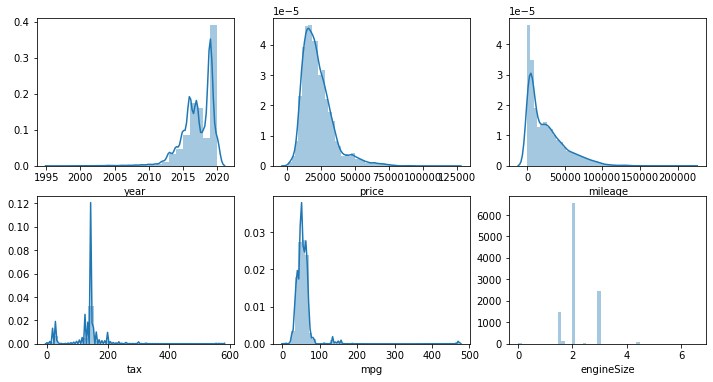

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.distplot(df['year'], ax=axes[0, 0], bins = 24)
sns.distplot(df['price'], ax=axes[0, 1])
sns.distplot(df['mileage'],ax=axes[0, 2])
sns.distplot(df['tax'], ax=axes[1, 0],bins = 30)
sns.distplot(df['mpg'], ax=axes[1, 1])
sns.distplot(df['engineSize'], ax=axes[1, 2], kde=False)
plt.show()

There are few things we can notice in these histograms:
1. The target value `price` is right skewed, in order to have a better result in the prediction, we need to do a log transformation.
2. The `mileage` attribute is seriously right skewed, which means most of the cars did not drive long before they were sold.
3. The `tax` mainly distribute between 100 and 200, there's also a lower peak between 0 and 50. The distribution of tax is very different fron price's, which means the tax charged does not purely depend on the price of the car, it may also depend on other factors like the state tax policy.
4. Most cars have `engineSize` smaller than 3.

`model`, `transmission`, `fuelType` are categorical attributes. We can use `value_counts()` function to check what categories exist and how many cars belong to each category. For example, let's check how many cars belong to each `fuelType`.

In [15]:
df["fuelType"].value_counts()

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

Although electric has already become a trend in the automobile industry, BMW remains focused on the traditional energy vehicle market, we can see that most cars are powered by dissel or petrol. There are only 3 electric cars in the entire data, and they could be from the same model, so let's extract the information of these observations to see if this is the case。

In [18]:
df[df["fuelType"]=="Electric"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8375,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
8400,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


Our guess was right, the only ekectric model on sale is i3. Electric models only account for a very small percentage of overall sales, BMW seems to be lagging behind on this track compared to the rising electric car giants like Tesla.

Another way to check the distribution of categorical data is building barplots:

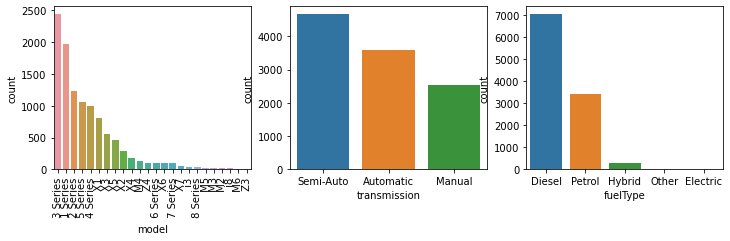

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
ax = sns.countplot(x = "model", data = df, order = df['model'].value_counts().index, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.countplot(x ='transmission', data = df,  order = df['transmission'].value_counts().index, ax=axes[1])
sns.countplot(x ='fuelType', data = df, order = df['fuelType'].value_counts().index, ax=axes[2])

From the barplots we can see that:
1. The best-selling `model` are classical 1-5 Series
2. Cars with Semi-Auto and Auto `transmission` are more popular than cars with manual transmission
3. In terms of `fuelType`，Most cars are powered by dissel or petrol

## Split Data into Training and Testing set
Before we do a further investigation, we need to split the data into training part and testing part, the training part is used for training the model, the testing data is used for testing the performance of the model. In this project, we will use 30% of the data for testing.

In [100]:
train, test = train_test_split(df, test_size = 0.3, random_state = 72, stratify = df["model"])

Note: Since we need both the training and testing set include all the models, so we can make prediction of a new instance in any model, so we set the argument `stratify='model'`.

In [101]:
train.shape

(7546, 9)

In [102]:
test.shape

(3235, 9)

The data is splited successfully!

----

<a id="discover-and-visualize-the-data"></a>
# Discover and Visualize the Data 
So far, we have only taken a quick glance at the data to get a general understanding, now the goal is to go into a little more depth. In this part, we will conduct a explortary analysis on the data, this is also a necessary preparation for the modeling works in the next step. 

In this part, we put the test aside and only explore the training set, we creat a copy named bmw, so that we can play with it without harming the training set.

In [76]:
bmw = train.copy()

## Looking for Correlations
Since the data set is not too large, we can easily compute the standard correlation coefficient between every pair of attributes using `corr()` method:

In [29]:
corr_matrix = bmw.corr()
corr_matrix

,year,price,mileage,tax,mpg,engineSize,log_price
year,1.000000,0.625621,-0.780979,0.005143,-0.066922,-0.032303,0.775380
price,0.625621,1.000000,-0.606931,0.250127,-0.199308,0.453891,0.932110
mileage,-0.780979,-0.606931,1.000000,-0.142991,0.112978,-0.002354,-0.737466
tax,0.005143,0.250127,-0.142991,1.000000,-0.348428,0.427828,0.275289
mpg,-0.066922,-0.199308,0.112978,-0.348428,1.000000,-0.396684,-0.173018
engineSize,-0.032303,0.453891,-0.002354,0.427828,-0.396684,1.000000,0.392937
log_price,0.775380,0.932110,-0.737466,0.275289,-0.173018,0.392937,1.000000


We can also plot a heatmap of the correlation coefficient

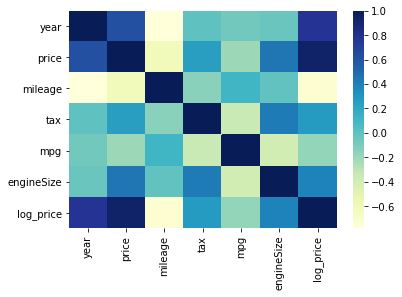

In [63]:
sns.heatmap(corr_matrix,cmap="YlGnBu")
plt.show()

Pairplot is another useful way to investigate the relationship between numeric attributes.

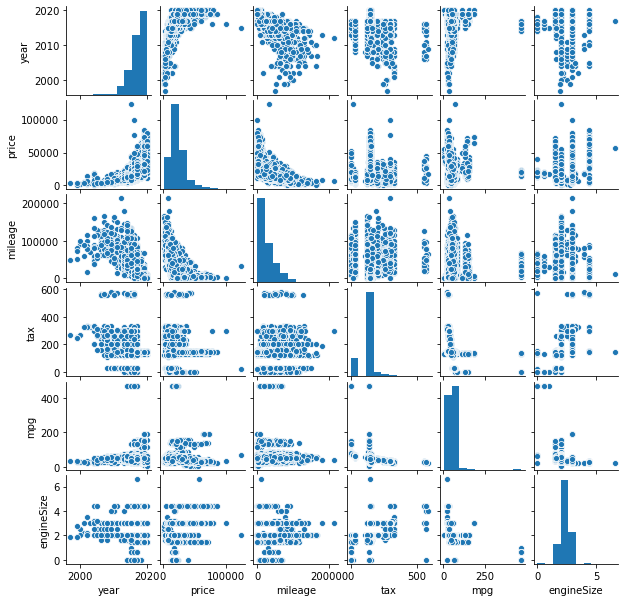

In [78]:
g = sns.pairplot(bmw)
g.fig.set_size_inches(8,8)
plt.show()

From the heatmap and pairplot, we can see that there's a strong postive corrolation between `price` and `year`, there's also a strong negative corrolation between `price` and `mileage`, so if we want to build a model for predicting price, the most promising attributes are `year` and `mileage`.

## Check Outliers with Boxplot
As we know, the price of a car depends not only on the mileage and year of manufacture, but also on its model, some models are luxurious and some are more economical. We can find out the price range of different models by creating boxplot.

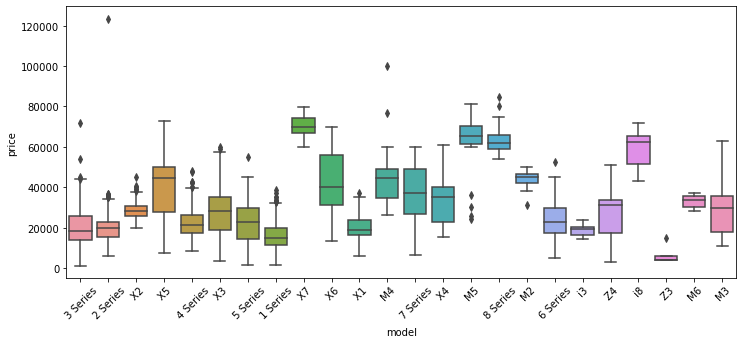

In [37]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="model", y="price", data=bmw)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

From the boxplot above, we can see that the price varies alot across different models. Models like X7, M5 and 8 Series are more expensive than others，on the other hand, the only eletric model i3 is not as expensive as we thought, which only costs about $20000.

From the boxplot, we also notice that the price of one observation in 2 Series is unusually high, Let's check what's causing the price abnormality.

In [66]:
bmw[bmw['price']>100000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0


We find that this observation is an 2-Series model with price 123456, it doesn't look like a real price, but like a human error. So this observation needs to be removed.

In [72]:
bmw = bmw[bmw['price']<100000]

----

<a id="regression-analysis"></a>
# Regression Analysis with statsmodels

**statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. In this section, we will use statsmodels to built a Ordinary Least Squares(ols) model and conduct regression analysis.

## Build a Simple Linear Regression Model
In the last section, we saw that some attributes like `mileage` and `year` have linear relationship with `price_log`, other categorical attributes like `model` also infulence the `price`. In this section, we firstly build a simple linear regression model with only one attribute `year`.

As we have seen in the last section, the distribution of `price` is right skewed, in this condition, we can conduct a log transformation to make it as “normal” as possible so that the statistical analysis results from this data become more valid. 

In [84]:
bmw["log_price"] = np.log(bmw["price"])

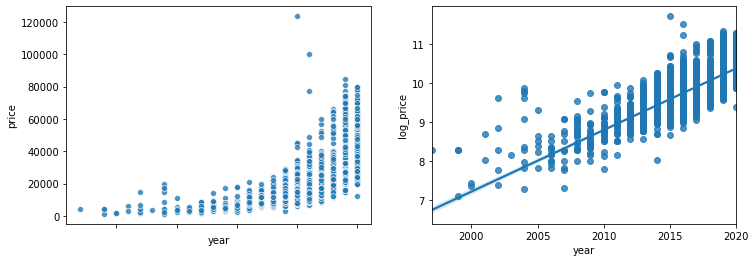

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sns.scatterplot(x = "year", y = "price",data = bmw, alpha = 0.8, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.regplot(x ='year', y = "log_price", data = bmw, ax=axes[1])
plt.show()

After the transformation, the linear relationship between `year`, `mileage` and `log_price` has become stronger. Now, let's build the model.

In [62]:
reg_model_simple = ols("log_price ~  year", data=bmw).fit()
reg_model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:43:50   Log-Likelihood:                -1779.1
No. Observations:                7545   AIC:                             3562.
Df Residuals:                    7543   BIC:                             3576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -309.8311      2.987   -103.726      0.000    -315.686    -303.976
year           0.1585      0.001    107.045      0.000       0.156       0.161
==============================================================================
Omnibus:                     1029.128   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2173.533
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The cofficient of determination R squared is quite good for a one variable regression at 0.603, the test for the significance of the model rejects the null hypothesis of no linear dependence between `log_price` with `year` with very small p value.
- The coefficient of year is positive, this implies that with one unit increase in `year`, the `log_price` is expeccted to increase by 0.158
- For example, if we want to predict the price of a car made in 2020, we can calculate the price as: log_price = 309.83 + 2020*0.1585 = 10.34, price = exp(10.34) = 30946.03

## Build a Mulitiple Linear Regression Model
The perfoormance of simple linear regression model with only one variable is limitted, in order to improve the degre of acccuracy, we need to add other variables and build a mulitiple regression.

In [92]:
reg_model = ols("log_price ~ mileage + year + model + tax + transmission + engineSize + mpg + fuelType",data=bmw).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3101.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:11:02   Log-Likelihood:                 4954.7
No. Observations:                7546   AIC:                            -9839.
Df Residuals:                    7511   BIC:                            -9597.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -199.4020      2.151    -92.706      0.000    -203.618    -195.186
model[T. 2 Series]            0.0225      0.006      4.017      0.000       0.012       0.034
model[T. 3 Series]            0.1177      0.005     23.851      0.000       0.108       0.127
model[T. 4 Series]            0.1519      0.006     24.484      0.000       0.140       0.164
model[T. 5 Series]            0.1984      0.006     31.313      0.000       0.186       0.211
model[T. 6 Series]            0.2547      0.015     16.466      0.000       0.224       0.285
model[T. 7 Series]            0.4372      0.016     27.754      0.000       0.406       0.468
model[T. 8 Series]            0.6944      0.025     27.663      0.000       0.645       0.744
model[T. M2]                  0.4151      0.033     12.566      0.000       0.350       0.480
model[T. M3]                  0.7962      0.030     26.558      0.000       0.737       0.855
model[T. M4]                  0.5115      0.015     34.954      0.000       0.483       0.540
model[T. M5]                  0.5637      0.030     18.934      0.000       0.505       0.622
model[T. M6]                  0.4206      0.053      7.912      0.000       0.316       0.525
model[T. X1]                  0.1450      0.007     22.205      0.000       0.132       0.158
model[T. X2]                  0.1658      0.010     16.847      0.000       0.147       0.185
model[T. X3]                  0.3345      0.008     42.268      0.000       0.319       0.350
model[T. X4]                  0.3682      0.012     29.740      0.000       0.344       0.392
model[T. X5]                  0.5429      0.009     59.014      0.000       0.525       0.561
model[T. X6]                  0.5446      0.016     34.421      0.000       0.514       0.576
model[T. X7]                  0.8396      0.022     39.032      0.000       0.797       0.882
model[T. Z3]                  0.8531      0.059     14.532      0.000       0.738       0.968
model[T. Z4]                  0.1877      0.015     12.449      0.000       0.158       0.217
model[T. i3]                  1.4099      0.064     22.117      0.000       1.285       1.535
model[T. i8]                  1.1575      0.038     30.534      0.000       1.083       1.232
transmission[T.Manual]       -0.0882      0.004    -19.607      0.000      -0.097      -0.079
transmission[T.Semi-Auto]     0.0184      0.004      5.181      0.000       0.011       0.025
fuelType[T.Electric]          0.1734      0.078      2.226      0.026       0.021       0.326
fuelType[T.Hybrid]            0.2595      0.014     19.206      0.000       0.233       0.286
fuelType[T.Other]             0.2074      0.030      7.002      0.000       0.149       0.265
fuelType[T.Petrol]           -0.0258      0.004     -5.864      0.000      

- After adding all the attributes to the model, R-squared increased to 0.936, the test for the significance of the model rejects the null hypothesis of no linear dependence between `log_price` with attributes with very small p value.
- The interpretation of coefficients in multiple linear model is more difficult, take `year` as a example again, in this model the coefficient means that with all the other variables fixed, one unit increase in `year` will lead to 0.1037 increase in `log_price`.

## Regression Diagnostics
In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using ols, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold (at least approximately).One solution to the problem of uncertainty about the correct specification is conducting diagnostics to test whether our sample is consistent with these assumptions.

### Normality and Distribution of redisuals
The linear regression analysis requires all variables to be multivariate normal. This assumption can best be checked with a histogram or a Q-Q-Plot. Normality can be checked with a goodness of fit test.

In [93]:
# calculate the residuals
resid = reg_model.resid
# calculate standardized residuals
standardized_residuals = reg_model.get_influence().resid_studentized_internal
# calculate the fitted values
fitted_value = reg_model.fittedvalues

In [95]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(resid)
list(zip(name,test))

[('Jarque-Bera', 117716.5620970566),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.6580045957759288),
 ('Kurtosis', 22.30452845227589)]

Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. Here, the small p-value implies that the null hypothesis: the distribution of residuals is not norm is rejected, we can also verify this by creating a qqplot.

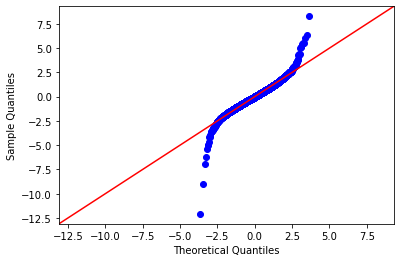

In [482]:
qqplot(data = resid, fit=True,line="45")
plt.show()

Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. In the plot above, most residuals are located on the diagnal line,only some points at the ends deviate from the line. This situation is normal in the real world data.

### Heteroskedasticity tests
The last assumption of the linear regression analysis is homoscedasticity.  The scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).

In [41]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
hete_test = sms.het_breuschpagan(reg_model.resid, reg_model_simple.model.exog)
list(zip(name, hete_test))

[('Lagrange multiplier statistic', 299.66420225755246),
 ('p-value', 7.021056825998903e-49),
 ('f-value', 12.439313785713551),
 ('f p-value', 5.463621000114811e-50)]

The Breusch–Pagan test is used to test for heteroskedasticity in a linear regression model. In our case, the p-value is very small, which means the residuals have consistent variance. This can also be verified by the plot of fitted value vers residuals.Most standardized residuals are within the range (-3,3)

[Text(0, 0.5, 'standardized_residuals'), Text(0.5, 0, 'fitted_value')]

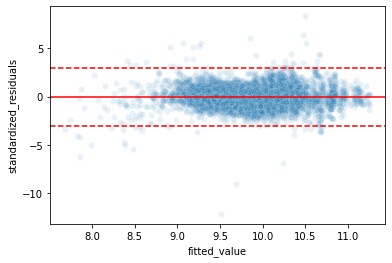

In [551]:
g = sns.scatterplot(x=fitted_value, y=standardized_residuals,alpha=0.1)
g.axhline(0, c='red')
g.axhline(3, ls='--', c='red')
g.axhline(-3, ls='--', c='red')
g.set(xlabel="fitted_value", ylabel="standardized_residuals")

### Outlier and Influence point
In the residual plot above, we can see some observations with large residuals, these points may have larger influence on the regression estimates. we want to check if they are outliers need to be removed.

In [54]:
summary = reg_model.get_influence().summary_frame()
leverage =  summary["hat_diag"]
cooks_dist = summary["cooks_d"]

In statistics, Cook's distance is a common measurement of a data point's influence. It's a way to find influential outliers in a set of predictor variables when performing a least-squares regression analysis. Usually we compare the cook's distnce to F(0.5,p,n-p), where p is number of attributes and n is number of observation.

In [42]:
from scipy.stats import f
cutoff = f.ppf(0.5,34,7511)
print("cutoff:",cutoff)

cutoff: 0.9805491658961749


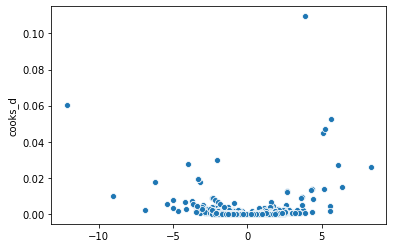

In [56]:
sns.scatterplot(x=standardized_residuals, y = cooks_dist)
plt.show()

All the cook's distance is smaller than the cutoff, so we will not remove any observations.

----

#  Part II: Machine Learning with scikit-learn
Scikit-learn is a free software machine learning library based on Python.It features various classification, regression and clustering algorithms. In this section, we will use `LinearRegression()` and `RandomForestRegressor()` to build 3 different models to make the prediction. We will also evaluate and compare their performance.

<a id="prepare-the-dasta-for-modelin"></a>
# Prepare the Data for Modeling

In order to build and train the model more efficiently , we need to preprocess the data to make the data ready for modeling, the precess includes:
1. Clean the data
2. Split the data into data and labels
3. Standarize the numeric data
4. One-Hot Encoding the categorical data

## Cleaning Data
As we have checked in the first section, there's no missing value and Inconsistency in the dataset, so we don't need to do too much. The only thing we need to do is remove the abnormal observation with wrong price as we did in the last section.

In [97]:
train = train[train['price']<100000]

Another thing we need to do is converting the type of original data `model`, `transmission`, `fuelType` into categorical data.

In [51]:
for col in ["model", "transmission", "fuelType"]:
    train[col] = train[col].astype('category')

In [98]:
train.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

## Spliting Data
The training and testing data need to be divided into data for training and label, in this project, we make `price` as our target value, other variables are used as predictors.

In [103]:
X_train = train.drop(columns='price', axis=1)
y_train = train['price'].copy()
X_test = test.drop(columns='price', axis=1)
y_test = test['price'].copy()

## One-Hot Encoding the Categorical Data
`model`, `transmission` and `fuelType` are supposed to be categorical and need to be modified. This is because that some machine learning methods do not natively support categorical data, like `transmission`, which contains 3 different categories. Thus, in order to use categorical data with scikit learn, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `OneHotEncoder()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), we will apply `OneHotEncoder()` in this project.

In [54]:
X_cat = X_train[["model", "transmission", "fuelType"]]
cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)

## Centering and Scaling Numeric Data
Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. The most common techniques of feature scaling are **Normalization** and **Standardization**.
Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1. In this project we will apply Standardization.

In [55]:
X_num = X_train[["year","mileage","tax", "mpg", "engineSize"]]
std_scaler = StandardScaler()
X_num_std = std_scaler.fit_transform(X_num)

## Conduct the Transformation in One Pipeline

In [56]:
num_var = ["year","mileage","tax", "mpg", "engineSize"]
cat_var = ["model", "transmission", "fuelType"]

pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_var),
    ("cat", OneHotEncoder(), cat_var),
])

In [57]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# Note: Use fit_transform() on training data, transform() on testing data

----

<a id="build-machine-learning-models"></a>
# Build  Machine Learning Models
Now, the data is correctly formatted for making machine learning models. So let's do it.

## Linear Regression Model

**Linear Regression** is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables, it is one of the most useful model for predicting continuous target values. We will build a basic linear regression model first.

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

Next, let's check how this model performs in the training data

In [59]:
y_pred_lin = lin_reg.predict(X_train_prepared)
mse_lin = mean_squared_error(y_train,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("RMSE of Linear Regression Model:",rmse_lin)

RMSE of Linear Regression Model: 4014.874747319671


RMSE is 4014, considering the mean of the price is 22733, this is a pretty large number, which implies the model doesn't fit the data very well, the poor performance may caused by underfitting, we need to try some other more advanced models. 

## Polynomial Regression Model
**Polynomial Regression** is also a linear model which include not only independent variables in X, but also an nth degree polynomial in X. Here, we will try a polynomial model with degree equals to 2.

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train_prepared)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
y_pred_poly = poly_reg.predict(X_poly)
mse_poly = mean_squared_error(y_train,y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("RMSE of Poly Regression Model:",rmse_poly)

RMSE of Poly Regression Model: 2597.8882027703244


It looks good! the RMSE has decreased from 4015 to 2598, this is a huge improvement, but there's a questions we need to think about.

The polymmomial did improve the model's performance on training data, but could that because of overfitting? Since we add quadratic terms, the new model may have lower bias but higher variance, that means the model may have poor performance in the testing data.

For the first question, we can apply cross validation score to test if the model is overfitted. Here, we will divide the data into 5 folds, use each part for test and others for training. Then calculate the mean and standar diviation of 5 RMSE. Let's first take a look at the cross validation score of basic linear regression model.

In [65]:
score_lin = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv = 5)
lin_rmse_scores = np.sqrt(-score_lin)
print("Mean of cross validation score:",lin_rmse_scores.mean())
print("Standar diviation of cross validation score:",lin_rmse_scores.std())

Mean of cross validation score: 4056.3370941923067
Standar diviation of cross validation score: 99.98513207324041


CV_Score is almost the same as the result on the whole training data. Next, let's check the CV_Score of the polynomial model.

In [66]:
score_poly = cross_val_score(poly_reg, X_poly, y_train, scoring="neg_mean_squared_error", cv = 5)
poly_rmse_scores = np.sqrt(-score_poly)
print("Mean of cross validation score:",poly_rmse_scores.mean())
print("Standar diviation of cross validation score:",poly_rmse_scores.std())

Mean of cross validation score: 3510.2192090046665
Standar diviation of cross validation score: 706.0169766453947


As the result shown, RMSE has increased a lot, the standar divation is also increased, which implies that the model's performance is not stable, Our concern about overfitting is verified. Since both of the linear model are not satisfying, we turn to tree-based model to see if there's a chance to make difference.

## Random Forest Regression Model
**Decision Tree** is a supervised machine learning model used to predict a target by learning decision rules from features. The decision tree method is usually used for sloving classification problems, but it is also capable for sloving regression problem.

Decision Tree is easy for understanding, but it usually leads to overfitting, a compromise for this problem is applying **Random Forest**. Random Forest is an ensemble tree-based learning method that constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees.

Calculate the RMSE on training data as we did before

In [67]:
rf_reg = RandomForestRegressor(random_state = 72)
rf_reg.fit(X_train_prepared, y_train)
y_pred_rf = rf_reg.predict(X_train_prepared)
mse_rf = mean_squared_error(y_train,y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE of Random Forest Model:",rmse_rf)

RMSE of Random Forest Model: 973.0719602658079


Then check the cross validation score

In [68]:
score_rf = cross_val_score(rf_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv = 5)
rf_rmse_scores = np.sqrt(-score_rf)
print("Mean of cross validation score:",rf_rmse_scores.mean())
print("Standar diviation of cross validation score:",rf_rmse_scores.std())

Mean of cross validation score: 2620.1901604804157
Standar diviation of cross validation score: 114.75228636762893


We can see that the performance of RandomForestRegressor is better than linear regression and polynomial regression model. Our direction is right, now we need to consider about how to optimize the model by tuning its parameters.

----

<a id="optimize-parameters"></a>
# Optimize Parameters with RandomSearchCV()
The Random Forest model we build is just a base-line model with default parameters, we can use multiple ways to try the different combination of parameters, the most popular way to tune the model is `GridSearchCV()` and `RandomSearchCV()`. Here, we will apply random search.

First, we build a random search grid for searching the best parameters.

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Next, we instantiate the random search and fit it like any Scikit-Learn model:

In [71]:
# search across 100 different combinations in 3 cv, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_prepared, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 501.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=72),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

We can view the best parameters from fitting the random search:

In [72]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

Check the performance of optimized model on training set

In [127]:
final_model = rf_random.best_estimator_
final_model.fit(X_train_prepared, y_train)
y_pred_final = final_model.predict(X_train_prepared)
mse_final = mean_squared_error(y_train,y_pred_final)
rmse_final = np.sqrt(mse_final)
print("RMSE of final Model:",rmse_final)

RMSE of final Model: 989.2817444761845


RMSE is 989, almost the same as the original modelbefore tuning. Let's see how it performs in cross validation.

In [77]:
score_rf_random = cross_val_score(rf_random.best_estimator_, X_train_prepared, y_train, 
                                  scoring="neg_mean_squared_error", cv = 5)
rf_random_scores = np.sqrt(-score_rf_random)
print("Mean of cross validation score:",rf_random_scores.mean())
print("Standar diviation of cross validation score:",rf_random_scores.std())

Mean of cross validation score: 2501.5198173066765
Standar diviation of cross validation score: 85.6999868341199


The cross validation score and the standar diviation both decrease, that's the result we expect, we will accept this model as the best model.

----

<a id="evaluate-model"></a>
# Evaluating the Optimized Model on Testing Set
After building and tuning the model, now is the time to evaluate the final model on testing set

Let's test how the final model performs in the testing data

In [126]:
final_test_predictions = final_model.predict(X_test_prepared)
final_test_mse = mean_squared_error(y_test,final_test_predictions)
final_test_rmse = np.sqrt(final_test_mse)
print("RMSE of Best Model on testing data:", lin_test_rmse)

2378.0822438399423

Next, we compare the performance of all the models we have built so far.

In [120]:
lin_test_predictions = lin_reg.predict(X_test_prepared)
lin_test_mse = mean_squared_error(y_test,lin_test_predictions)
lin_test_rmse = np.sqrt(lin_test_mse)
print("RMSE of Linear Regression Model on testing data:", lin_test_rmse)

RMSE on testing data: 4031.660313447852


In [123]:
X_test_poly = poly_features.transform(X_test_prepared)
poly_test_predictions = poly_reg.predict(X_test_poly)
poly_test_mse = mean_squared_error(y_test,poly_test_predictions)
poly_test_rmse = np.sqrt(poly_test_mse)
print("RMSE of Poly Regression Model on testing data:",poly_test_rmse)

RMSE of Poly Regression Model: 2843.7829130495843


In [125]:
rf_test_predictions = rf_reg.predict(X_test_prepared)
rf_test_mse = mean_squared_error(y_test,rf_test_predictions)
rf_test_rmse = np.sqrt(rf_test_mse)
print("RMSE of Random Forest Model on testing data:", rf_test_rmse)

RMSE of Random Forest Model on testing data: 2301.3993858812387


Finally, we build a table to summarize the performace of different models

In [130]:
score_dic = {'model': ['Linear Regression','Polynomial Regression','Random Forest','Random Forest (optimized)'],
        'RMSE_train': [4015,2598,973,989], 
        'CV_Score_mean':[4056, 3510, 2620, 2501], 
        'CV_Score_std':[100, 706, 115, 86], 
        'RMSE_test':[4031, 2843, 2301, 2378]
        }

In [132]:
score_summary = pd.DataFrame(score_dic, columns = ['model','RMSE_train', 'CV_Score_mean', 'CV_Score_std', 'RMSE_test'])
score_summary

,model,RMSE_train,CV_Score_mean,CV_Score_std,RMSE_test
0,Linear Regression,4015,4056,100,4031
1,Polynomial Regression,2598,3510,706,2843
2,Random Forest,973,2620,115,2301
3,Random Forest (optimized),989,2501,86,2378


From the table, we can see that the final model and original random forest model have similar performance, the original model even have smaller rmse in the testing data, there are two potential reasons to explain why this could happen:

1. We applied random search in the parameter optimization, we can not confirm that the parameter we used in the final model is the best solution. However, since the tuning is very time consuming, we will accept this result.

2. From the the table we can see that the final model have smaller mean and smaller standar diviation in CV score, which means this model is more stable, in another word, it may performs a little bit worse than the default model, but if we test more data, its overall performance will be better.

----

# Conclusion

In this project, we dived into the *used BMW car sales data* and did many studies. In the first part, we visualized the data and conduct aregression analysis. We Obtain a more comprehensive and in-depth understanding of the the car market. We also find some interesting facts in the data, for example, BMW has only one electric car on sale, and it's not as expensive as we thought.

In the second part, we built different machine learning models to predict the price of the car, after comparing the performance of linear regression, polynomial regression and random forest, we found the random forest model has the best performance, we tuned the model parameters with random search and test it on the testing data. The result is satisfying. We reduce the RMSE from 4031 to 2378, this is a huge improvement. 

This model can also be used to predict the price range of a BMW car before we go to the 4S shop and talk with the car dealer. In fact, some car selling Apps use machine technics to conduct valuation. This procedure can also be applied to other products or brands, this is how machine learning and big data make business more transparent and convenient.

## Thank you!